# LPA Experiments

In [126]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from sklearn import metrics
import scipy.io as sio
import time 
import collections
from sklearn.neighbors import NearestNeighbors
from LPA_GHF import *
import matplotlib.pyplot as plt

In [2]:
def convert_df(graph):
    nodes = pd.DataFrame()
    nodes['label'] = nx.get_node_attributes(graph, 'label').values()
    nodes = set_test_train(nodes, 20, 2)
    train_ids = nodes.loc[nodes["test_train"] == "LABELLED"].index
    test_ids = nodes.loc[nodes["test_train"] == "UNLABELLED"].index
    return nodes

In [3]:
def set_test_train(nodes, num_train=20, num_classes=2):
    """
    Mask the majority of the nodes' labels to create an environment for SSL
    """
    train_ids = []
    nodes["test_train"] = "UNLABELLED"
    all_nodes = list(nodes.index)

    while len(train_ids) < num_classes:
        for i in range(num_classes):
            current_class = nodes.loc[nodes["label"] == i].index
            samp_id = np.random.choice(current_class)
            train_ids.append(samp_id)

    while len(train_ids) < num_train:
        samp_id = np.random.randint(low=0, high=len(all_nodes))
        if samp_id in train_ids:
            continue
        train_ids.append(samp_id)

    if len(train_ids) > num_train:
        raise Exception("Incorrect sample number")

    nodes.loc[train_ids, 'test_train'] = "LABELLED"
    train_nodes = nodes.loc[nodes["test_train"] == "LABELLED"]

    if train_nodes['label'].nunique() != num_classes:
        raise Exception("The sampled set does not contain every class")

    return nodes

- Experiments:
	1. LPA on the original graph
	2. Random spanning tree then linear embedding (spine) (ensemble: 1,3,5,7,15,31) . One spine per tree, LPA on the spines.
	3. Minimal spanning tree LPA 


- LPA options: assign labels according to 
	1. K Nearest Neighbour (explore different choices of K)
	2. LPA implemented in GAMMA (Gaussian field harmonic functions)


- RST and spine: 
	1. Use random walk to generate RSTs
	2. For each RST, use depth first search to generate a spine (drop duplicates in a fixed way, like drop all but the first occurrence)
	3. Random sample labels from the spines
	4. Propagate labels on each spine using LPA
	5. Ensemble the results on the spines


## Data Loading

In [6]:
bahoc_W = sio.loadmat(file_name="./sample_graphs/20newsgroups/baseballhockey/baseballhockey_graph.mat")['W']
pcmac_W = sio.loadmat(file_name="./sample_graphs/20newsgroups/pcmac/pcmac_graph.mat")['W']
wimac_W = sio.loadmat(file_name="./sample_graphs/20newsgroups/windowsmac/windowsmac_graph.mat")['W']
bahoc_Y = sio.loadmat(file_name="./sample_graphs/20newsgroups/baseballhockey/baseballhockey_Y.mat")['Y']
pcmac_Y = sio.loadmat(file_name="./sample_graphs/20newsgroups/pcmac/pcmac_Y.mat")['Y']
wimac_Y = sio.loadmat(file_name="./sample_graphs/20newsgroups/windowsmac/windowsmac_Y.mat")['Y']

In [134]:
pcmac_W

<1943x1943 sparse matrix of type '<class 'numpy.float64'>'
	with 28576 stored elements in Compressed Sparse Column format>

In [135]:
28576/1943


14.707153885743695

In [7]:
bahoc_label = dict(zip(np.arange(bahoc_Y.shape[0]), bahoc_Y[:,0]))
pcmac_label = dict(zip(np.arange(pcmac_Y.shape[0]), pcmac_Y[:,0]))
wimac_label = dict(zip(np.arange(wimac_Y.shape[0]), wimac_Y[:,0]))

bahoc_G = nx.Graph(bahoc_W)
pcmac_G = nx.Graph(pcmac_W)
wimac_G = nx.Graph(wimac_W)

nx.set_node_attributes(G=bahoc_G, name='label', values=bahoc_label)
nx.set_node_attributes(G=pcmac_G, name='label', values=pcmac_label)
nx.set_node_attributes(G=wimac_G, name='label', values=wimac_label)

In [8]:
in_graphs = {'bahoc':bahoc_G,'pcmac':pcmac_G,'wimac':wimac_G}
in_trees = {key: nx.minimum_spanning_tree(in_graphs[key]) for key in in_graphs.keys()}

In [9]:
in_trees

{'bahoc': <networkx.classes.graph.Graph at 0x1a138d4860>,
 'pcmac': <networkx.classes.graph.Graph at 0x1a138d4710>,
 'wimac': <networkx.classes.graph.Graph at 0x1a138d47b8>}

## Settings

In [7]:
DEFAULT_PARAMS = {
    'NUM_CLASSES': 2,
    'NUM_TRIALS': 10,
    'NUM_TRAIN': range(4, 100, 10)
}

In [53]:
def G_LPA(graphs):
    print("Running LPA...")
    thres = {}
    cmn = {}
    for key in graphs.keys():
        start = time.time()
        print(key)
        thres[key],cmn[key] = LPA(graphs[key], DEFAULT_PARAMS).demo()
        end = time.time()
        print('Time:',end-start)
    print("Finished!")
    return thres, cmn

In [54]:
def MST_LPA(trees):
    print("Running LPA on Minimal Spanning Tree...")
    thres = {}
    cmn = {}
    for key in trees.keys():
        start = time.time()
        print(key)
        thres[key],cmn[key] = LPA(trees[key], DEFAULT_PARAMS).demo()
        end = time.time()
        print('Time:',end-start)
    print("Finished!")
    return thres, cmn

In [ ]:
def RST(graph):
    tree_node = []
    tree_edge = []
    node_lsit = graph.nodes
    root = np.random.choice(node_lsit)
    for node in graph.neighbors(root):
        
    
    tree_node.append(root)
    tree_edge.
    

In [91]:
test_graph = in_graphs['pcmac']

In [92]:
test_nodes_df = convert_df(test_graph)

In [18]:
test_nodes_df.head()

,label,test_train
0,1,UNLABELLED
1,1,UNLABELLED
2,1,UNLABELLED
3,1,UNLABELLED
4,1,UNLABELLED


In [8]:
root = np.random.choice(test_graph.nodes)

In [10]:
curr_node=root

In [11]:
np.random.random()

0.4555833043597157

In [19]:
def rst_spine(num_rst,graph,epsilon=0.2,weight=False):
    rst_list = []
    sp_list = []
    while len(set(rst_list)) < num_rst:
        print("Generating RST No.",len(set(rst_list))+1,"...")
        start = time.time()
        visited_nodes = []
        visited_edges = []
        rst_root = np.random.choice(graph.nodes)
        curr_node = rst_root
        visited_nodes.append(rst_root)
        while len(set(visited_nodes)) < graph.number_of_nodes():
            neighb_list = [node for node in graph.neighbors(curr_node)]
            if weight:                
                if len(set(visited_nodes)) > 0.9 * graph.number_of_nodes():
                    epsilon = 0.8
                weight_list = [graph.get_edge_data(curr_node,node)['weight'] for node in graph.neighbors(curr_node)]
                trans_prob = weight_list/sum(weight_list)
                if np.random.random() > epsilon:
                    next_node = np.random.choice(a=neighb_list,p=trans_prob)
                else:
                    next_node = np.random.choice(a=neighb_list)
                    
            else:
                next_node = np.random.choice(a=neighb_list)
            if next_node not in visited_nodes:
                visited_edges.append((curr_node,next_node))
            visited_nodes.append(next_node)
            curr_node = next_node
        rst = nx.Graph(visited_edges)
        print("Tree? :",nx.is_tree(rst))
        spine = [node for node in nx.dfs_preorder_nodes(rst,rst_root)]
        rst_list.append(rst)
        sp_list.append(spine)
        end = time.time()
        print("Time:",end-start,"\n")
        
    print("Finished!")
    return rst_list,sp_list

In [58]:
rst_list, sp_list = rst_spine(100,test_graph)

Generating RST No. 1 ...
Tree? : True
Time: 51.58488702774048 

Generating RST No. 2 ...
Tree? : True
Time: 41.27841782569885 

Generating RST No. 3 ...
Tree? : True
Time: 90.47809195518494 

Generating RST No. 4 ...
Tree? : True
Time: 36.58950686454773 

Generating RST No. 5 ...
Tree? : True
Time: 28.373498916625977 

Generating RST No. 6 ...
Tree? : True
Time: 46.30476903915405 

Generating RST No. 7 ...
Tree? : True
Time: 34.48046112060547 

Generating RST No. 8 ...
Tree? : True
Time: 29.010735750198364 

Generating RST No. 9 ...
Tree? : True
Time: 36.2499361038208 

Generating RST No. 10 ...
Tree? : True
Time: 39.83260989189148 

Generating RST No. 11 ...
Tree? : True
Time: 39.98502802848816 

Generating RST No. 12 ...
Tree? : True
Time: 22.62920904159546 

Generating RST No. 13 ...
Tree? : True
Time: 36.930402994155884 

Generating RST No. 14 ...
Tree? : True
Time: 30.543812036514282 

Generating RST No. 15 ...
Tree? : True
Time: 33.34226107597351 

Generating RST No. 16 ...
Tree?

In [212]:
test_tree = rst_list[0]
[i for i in nx.neighbors(test_tree,1)]

[676, 213]

In [224]:
test_dict = nx.single_source_shortest_path_length(test_tree,1)

In [234]:
keys = test_dict.keys()
nn_dict={}
for key in keys:
    if test_dict[key]<=5 and test_dict[key]>=1:
        nn_dict[key] = test_dict[key]
        

In [246]:
aa = 1/np.array(list(nn_dict.values()))
aa = aa / sum(aa)

In [263]:
nn_dict

{676: 1,
 213: 1,
 606: 2,
 319: 2,
 800: 2,
 142: 3,
 1428: 3,
 392: 3,
 161: 3,
 1670: 4,
 322: 4,
 1362: 4,
 1768: 5,
 1891: 5,
 1123: 5,
 1150: 5,
 942: 5,
 827: 5,
 1046: 5,
 1576: 5}

In [262]:
nn_dict.keys()

dict_keys([676, 213, 606, 319, 800, 142, 1428, 392, 161, 1670, 322, 1362, 1768, 1891, 1123, 1150, 942, 827, 1046, 1576])

In [249]:
dict(zip(nn_dict.keys(),aa))

{676: 0.13921113689095124,
 213: 0.13921113689095124,
 606: 0.06960556844547562,
 319: 0.06960556844547562,
 800: 0.06960556844547562,
 142: 0.04640371229698375,
 1428: 0.04640371229698375,
 392: 0.04640371229698375,
 161: 0.04640371229698375,
 1670: 0.03480278422273781,
 322: 0.03480278422273781,
 1362: 0.03480278422273781,
 1768: 0.027842227378190254,
 1891: 0.027842227378190254,
 1123: 0.027842227378190254,
 1150: 0.027842227378190254,
 942: 0.027842227378190254,
 827: 0.027842227378190254,
 1046: 0.027842227378190254,
 1576: 0.027842227378190254}

In [243]:
sum((nn_dict.values()))

72

In [23]:
## Just In Case
# TODO: nx find depth of a tree

def get_NN(graph,nodes_df,nodeid):
    path_len_dict = nx.single_source_shortest_path_length(graph,nodeid)
    ascending_dist = list(path_len_dict.keys())
    labelled_ascd_list = nodes_df.loc[ascending_dist,'test_train'] == "LABELLED"
    nn = labelled_ascd_list[0]
    lab = nodes.loc[nn, "label"].values
    return lab

def get_k_NN(graph,nodes_df,nodeid,k):
    # nodes_df is a pd df
    path_len_dict = nx.single_source_shortest_path_length(graph,nodeid)
#     [node for node,length in path_length.iteritems]
    knn_dict = {}
    labelled_knn_dict = {}
    for key in path_len_dict.keys():
        if path_len_dict[key]<=k and path_len_dict[key]>=1:
            knn_dict[key] = path_len_dict[key]
            
    for key in knn_dict.keys():
        if nodes_df.loc[key, 'test_train'] == "LABELLED":
            labelled_knn_dict[key] = knn_dict[key]
    if labelled_knn_dict == {}:
        print("No labelled nodes found within k hops")
        return get_NN(graph,nodes_df,nodeid)
    else:
        weight_list = 1/np.array(list(labelled_knn_dict.values()))
        weight_list = weight_list/sum(weight_list)
        weight_dict = dict(zip(labelled_knn_dict.keys(), weight_list))
        
        labs = np.array(nodes_df.loc[list(weight_list.keys()),'label'].values)
        lab = np.dot(labs,weight_list.T) # return a single number here
        if lab > 0.5:
            return 1
        else:
            return 0
    # TODO: find the nx method to get the nodes that are k hops away [DONE]
    # TODO: set decaying weights according to hop number [CRUDE ONE DONE]
    # TODO: make sure the weights for all labelled nodes within k hops add up to 1 [CRUDE ONE DONE]

def LPAOneNN(graph,nodes_df):
    # For spines
    if type(graph) is list:
        pred_dict = {}
        labelled_idx = []
        unlabelled_idx = []
        labelled_dict = {}
        for i in range(len(graph)):
            if nodes_df.loc[graph[i], 'test_train'] == "LABELLED":
                labelled_dict[graph[i]] = nodes_df.loc[graph[i],'label']
                labelled_idx.append(i)
            else:
                unlabelled_idx.append(i)
        
        for idx in unlabelled_idx:
            left_lab_list = [i for i in labelled_idx if i <= idx]
            right_lab_list = [i for i in labelled_idx if i >= idx]
            
            if len(left_lab_list) == 0:
                right_nn_idx = min(right_lab_list)
                pred_dict[graph[idx]] = labelled_dict[graph[right_nn_idx]]
            elif len(right_lab_list) == 0:
                left_nn_idx = max(left_lab_list)
                pred_dict[graph[idx]] = labelled_dict[graph[left_nn_idx]]

#             if idx == 0: 
#                 right_nn_idx = min([i for i in labelled_idx if i >= idx])
#                 pred_dict[graph[idx]] = labelled_dict[graph[right_nn_idx]]
#             if idx == len(nodes_df)-1:
#                 left_nn_idx = max([i for i in labelled_idx if i <= idx])
#                 pred_dict[graph[idx]] = labelled_dict[graph[left_nn_idx]]
                
            else:
                left_nn_idx = max([i for i in labelled_idx if i <= idx])
                right_nn_idx = min([i for i in labelled_idx if i >= idx])
                
                left_dist = idx - left_nn_idx
                right_dist = right_nn_idx - idx
                if left_dist < right_dist:
                    pred_dict[graph[idx]] = labelled_dict[graph[left_nn_idx]]
                if left_dist > right_dist:
                    pred_dict[graph[idx]] = labelled_dict[graph[right_nn_idx]]
                if left_dist == right_dist:
                    pred_dict[graph[idx]] = np.random.choice([0,1])
                
    return labelled_dict,pred_dict
    # TODO: Test LPAOneNN()
    # TODO: Method for trees
        
    
def NN_propagate(graph,nodes_df,k):
    train_ids
    test_ids
    for node in test_ids:
        if k > 1:
            label = get_k_NN(graph,nodes_df,node,k)
        if k == 1:
            label = get_NN(graph,nodes_df,node)
            
        nodes_df.loc[node,'NN'] = label
    
    nodes_df.loc[train_ids, 'NN'] = nodes.loc[train_ids, 'label'].values
    
    


In [96]:
def SpineLPAOneNN(spines,num_spine,nodes_df):
    for num in num_spine:
        print(num)
        nodes_df[num] = pd.Series(np.zeros(len(nodes_df)),index=nodes_df.index)
        for spine in spines[:num]:
            lab_dict,pred_dict = LPAOneNN(spine,nodes_df)

            lab_keys = list(lab_dict.keys())
            lab_vals = np.array(list(lab_dict.values()))

            pred_keys = list(pred_dict.keys())
            pred_vals = np.array(list(pred_dict.values()))

            nodes_df.loc[lab_keys,num] += lab_vals        
            nodes_df.loc[pred_keys,num] += pred_vals

        nodes_df.loc[lab_keys,num] = nodes_df.loc[lab_keys,num]/num
        nodes_df.loc[pred_keys,num] = nodes_df.loc[pred_keys,num]/num
    return nodes_df

In [122]:
def evalSpine(nodes_df,num_spine,spines):
    acc_list = []
    lab_dict,pred_dict = LPAOneNN(spines[0],nodes_df)
    lab_keys = list(lab_dict.keys())
    pred_keys = list(pred_dict.keys())
    for num in num_spine:
        pred_prob = np.array(nodes_df.loc[pred_keys,num])
        pred_ = (pred_prob>0.5)*1
        true_ = nodes_df.loc[pred_keys,'label']
        acc_ = metrics.accuracy_score(y_true=true_, y_pred=pred_)
        acc_list.append(acc_)
    return acc_list

In [120]:
aa= np.array([5,1,0.3,0.6])
(aa > 0.5)*1

array([1, 1, 0, 1])

In [123]:
accs = evalSpine(test_nodes_df,train_range,sp_list)

In [124]:
accs

[0.59334373374935,
 0.625065002600104,
 0.6214248569942797,
 0.6203848153926157,
 0.6214248569942797,
 0.625065002600104,
 0.6183047321892876,
 0.6510660426417056,
 0.6547061882475299,
 0.6760270410816432,
 0.6765470618824753,
 0.6796671866874675,
 0.6931877275091004,
 0.7009880395215808,
 0.7015080603224129,
 0.7108684347373895,
 0.7150286011440458,
 0.7228289131565263,
 0.7275091003640146,
 0.7399895995839834]

In [128]:
y = range(5,101,5)

Text(0.5,1,'PC vs MAC')

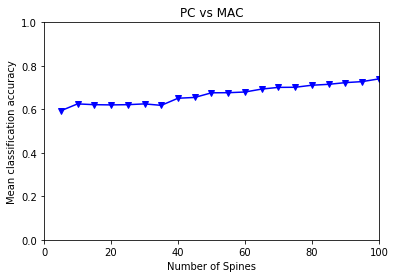

In [130]:
plt.plot(y,accs,'bv-')
plt.xlim(0,100)
plt.ylim(0.0, 1.0)
plt.xlabel('Number of Spines')
plt.ylabel('Mean classification accuracy')
# plt.legend(('Num of Spines'))
plt.title('PC vs MAC')

In [97]:
train_range = list(range(5,101,5))

In [98]:
result_df=SpineLPAOneNN(sp_list,train_range,test_nodes_df)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


In [100]:
result_df.loc[result_df['test_train']=='LABELLED']

,label,test_train,5,10,15,20,25,30,35,40,...,55,60,65,70,75,80,85,90,95,100
117,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
266,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
346,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
693,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
719,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
809,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
850,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
907,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
940,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
958,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [101]:
result_df.loc[result_df['test_train']=='LABELLED']

,label,test_train,5,10,15,20,25,30,35,40,...,55,60,65,70,75,80,85,90,95,100
117,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
266,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
346,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
693,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
719,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
809,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
850,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
907,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
940,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
958,1,LABELLED,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
lbdict,pddict = LPAOneNN(sp_list[0],test_nodes_df)

In [30]:
od_pddict = collections.OrderedDict(sorted(pddict.items()))
od_lbdict = collections.OrderedDict(sorted(lbdict.items()))

In [31]:
od_pddict

OrderedDict([(0, 0),
             (1, 0),
             (2, 1),
             (3, 0),
             (4, 1),
             (5, 1),
             (6, 0),
             (7, 0),
             (8, 0),
             (9, 0),
             (10, 1),
             (11, 1),
             (12, 0),
             (13, 1),
             (14, 1),
             (15, 0),
             (16, 0),
             (17, 0),
             (18, 0),
             (19, 0),
             (20, 1),
             (21, 1),
             (22, 1),
             (23, 0),
             (24, 0),
             (25, 0),
             (26, 1),
             (27, 0),
             (28, 0),
             (29, 1),
             (30, 1),
             (31, 0),
             (32, 1),
             (33, 1),
             (34, 0),
             (35, 0),
             (36, 1),
             (37, 1),
             (38, 0),
             (40, 1),
             (41, 0),
             (42, 1),
             (43, 1),
             (44, 1),
             (45, 0),
             (46, 1)

In [32]:
od_lbdict

OrderedDict([(39, 1),
             (59, 1),
             (153, 1),
             (260, 1),
             (297, 1),
             (569, 1),
             (612, 1),
             (645, 1),
             (776, 1),
             (785, 1),
             (862, 1),
             (1029, 0),
             (1122, 0),
             (1150, 0),
             (1264, 0),
             (1593, 0),
             (1619, 0),
             (1823, 0),
             (1829, 0),
             (1879, 0)])

In [197]:
len(test_nodes_df.loc[test_nodes_df['test_train']=='LABELLED'])

1943

In [141]:
tree = nx.Graph(visited_edges)
print("Tree? :",nx.is_tree(tree))
spine = [node for node in nx.dfs_preorder_nodes(tree,root)]

True


In [181]:
for a in tree.neighbors(970):
    print(a)

308
31


In [180]:
[node for node in nx.dfs_preorder_nodes(tree,root)][3]

31

In [170]:
[node for node in nx.dfs_postorder_nodes(tree,root)]

[1458,
 858,
 166,
 444,
 945,
 720,
 1045,
 1281,
 1895,
 1227,
 1017,
 1471,
 1088,
 1433,
 1246,
 1510,
 1773,
 1854,
 997,
 1381,
 1146,
 1788,
 1242,
 1646,
 1052,
 1295,
 1258,
 1632,
 1482,
 1092,
 1591,
 1836,
 1335,
 1585,
 1244,
 1885,
 1331,
 1770,
 1542,
 1501,
 1000,
 1914,
 1001,
 1495,
 29,
 1887,
 1207,
 1863,
 1225,
 1264,
 1880,
 1604,
 1110,
 678,
 1612,
 1513,
 1469,
 1857,
 664,
 1270,
 1904,
 114,
 1250,
 1587,
 1009,
 1240,
 1358,
 1818,
 993,
 1926,
 1251,
 1617,
 1293,
 1843,
 1922,
 1842,
 748,
 382,
 476,
 1420,
 1328,
 1096,
 1099,
 1795,
 276,
 1180,
 261,
 1203,
 1241,
 716,
 1036,
 951,
 232,
 1876,
 242,
 535,
 469,
 641,
 489,
 291,
 87,
 74,
 890,
 508,
 198,
 921,
 948,
 171,
 425,
 1664,
 159,
 397,
 438,
 374,
 579,
 879,
 511,
 433,
 90,
 134,
 306,
 295,
 112,
 275,
 21,
 228,
 977,
 519,
 783,
 416,
 1602,
 1202,
 1677,
 832,
 128,
 539,
 969,
 1208,
 1678,
 1785,
 1105,
 1126,
 1272,
 1330,
 1368,
 1883,
 1683,
 1845,
 1630,
 1763,
 846,
 931,
 

In [146]:
a = nx.dfs_postorder_nodes(tree, root)

In [126]:
bbb = []
for b in nx.dfs_preorder_nodes(tree, root):
    bbb.append(b)

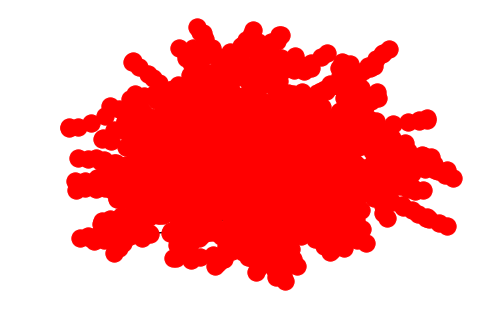

In [140]:
nx.draw(spine)
plt.draw()

In [127]:
len(bbb)

1943

In [128]:
ccc = []
for c in nx.dfs_edges(tree,root):
    ccc.append(c)

In [129]:
len(ccc)

1942

In [136]:
ccc[-2]

(156, 620)

In [137]:
bbb[-2]

620

In [98]:
import matplotlib.pyplot as plt

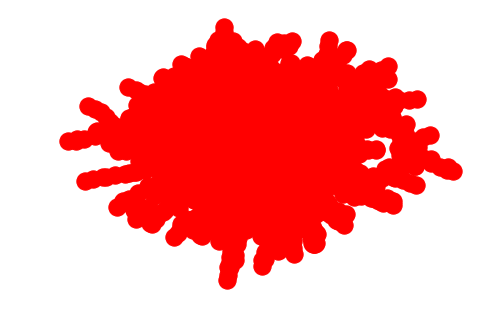

In [99]:
nx.draw(tree)
plt.draw()

In [94]:
len(set(visited_edges))

1942

In [ ]:
263 333 908 418

In [85]:
[node for node in test_graph.neighbors(418)]

[35, 83, 581, 908, 973, 1051, 1211, 1372, 1480, 1536, 1686, 1884]

In [84]:
[test_graph.get_edge_data(418,node) for node in test_graph.neighbors(418)]

[{'weight': 8.443797774111058e-14},
 {'weight': 3.3183641275020954e-14},
 {'weight': 5.0855242873730886e-14},
 {'weight': 2.520737442917057e-08},
 {'weight': 7.454732709737006e-14},
 {'weight': 5.880309079480777e-14},
 {'weight': 2.54041864972849e-14},
 {'weight': 6.670464354418697e-14},
 {'weight': 4.313447828837102e-14},
 {'weight': 8.284701548129786e-14},
 {'weight': 5.5552514662457004e-14},
 {'weight': 4.9756485175277304e-14}]

In [50]:
aaa

281

In [53]:
neighb_list

[2,
 31,
 61,
 156,
 208,
 241,
 242,
 281,
 353,
 419,
 447,
 501,
 509,
 535,
 539,
 641,
 970,
 1230,
 1282]

In [56]:
test_graph.get_edge_data(417,1282)

{'weight': 2.3565430567157603e-14}

In [42]:
weight_list/weight_sum

array([5.58840646e-08, 2.79709159e-07, 5.97599136e-07, 3.93663247e-07,
       5.79332099e-07, 4.93290762e-08, 1.29767500e-07, 9.99992595e-01,
       1.27985324e-06, 1.56985899e-07, 3.49768544e-07, 6.31123467e-08,
       1.97748789e-06, 3.10976814e-07, 5.25478982e-07, 2.91881289e-07,
       2.00787607e-07, 1.12819558e-07, 5.09398460e-08])

In [38]:
aaa = 0
for node in test_graph.neighbors(root):
    print(test_graph.get_edge_data(root,node)['weight'])
#     weight_sum += curr_weight
aaa

2.5852689936262068e-14
1.2939706871223361e-13
2.764570771093008e-13
1.82113701506707e-13
2.680065102116258e-13
2.2820267649887242e-14
6.003212126687441e-14
4.626094874102907e-07
5.920766338654949e-13
7.26237040796527e-14
1.618074451569672e-13
2.919658658472878e-14
9.14811434332418e-13
1.4386189002298537e-13
2.43093362842707e-13
1.3502805325338018e-13
9.288693983652714e-14
5.2191784469500606e-14
2.3565430567157603e-14


0

In [31]:
for a in test_graph.neighbors(root):
    print(a)

632
1007
1065
1120
1222
1264
1266
1320
1459
1601
1666
1744
1790


In [81]:
nx.get_edge_attributes(in_graphs['bahoc'],'weight')

{(0, 137): 4.983909103028168e-13,
 (0, 308): 2.1736150918794732e-10,
 (0, 352): 6.686533809876269e-14,
 (0, 381): 1.915740508935017e-13,
 (0, 480): 9.450432888333465e-09,
 (0, 668): 5.1148819729096796e-14,
 (0, 670): 2.276827985888706e-07,
 (0, 809): 2.5889243593886907e-13,
 (0, 814): 1.7231854106265482e-11,
 (0, 868): 7.927281885502715e-14,
 (1, 41): 5.072121092112301e-14,
 (1, 140): 4.995003393517512e-14,
 (1, 228): 1.2195245907939138e-13,
 (1, 459): 8.322954756750465e-10,
 (1, 602): 7.964437649150489e-12,
 (1, 677): 1.0608204637155116e-13,
 (1, 720): 1.9910640342325816e-10,
 (1, 763): 2.05266174989862e-09,
 (1, 878): 6.59890525141906e-14,
 (1, 948): 1.1016659465393723e-13,
 (2, 47): 1.614823350471195e-13,
 (2, 200): 2.1058124371365995e-13,
 (2, 309): 1.0573429694286993e-13,
 (2, 322): 3.6672381087962765e-14,
 (2, 417): 3.937192007059171e-12,
 (2, 455): 1.8411147340677974e-13,
 (2, 581): 1.5291395415892678e-13,
 (2, 607): 2.0645317883814776e-13,
 (2, 734): 2.025909657261914e-14,
 (2,

In [73]:
np.random.choice(list(in_graphs['bahoc'].nodes))

1582

## Runs

In [48]:
G_thres, G_cmn = G_LPA(graphs=in_graphs)

Running LPA...
bahoc
Time: 40.61310291290283
pcmac
Time: 36.94490098953247
wimac
Time: 35.948227882385254
Finished!


In [55]:
MST_thres, MST_cmn = MST_LPA(trees=in_trees)

Running LPA on Minimal Spanning Tree...
bahoc
Time: 37.593116998672485
pcmac
Time: 42.07006788253784
wimac
Time: 43.05665302276611
Finished!
